# Práctico 4:

1. Implementar un pipeline de clasificación con la muestra que se vió en clase. El código para traer el dataset es el siguiente:

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())
X, y = mnist["data"], mnist["target"]
print(mnist.head())

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48'

In [6]:
#Simplificar el problema al detectar un dijito, primero seteo el test y el train
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np
# Convertir las etiquetas a números enteros
y = y.astype(np.uint8)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador binario para detectar el número 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(random_state=42))
])

# Entrenar el pipeline
pipeline.fit(X_train, y_train_5)

# Realizar predicciones en el conjunto de prueba
y_test_pred = pipeline.predict(X_test)

# Calcular la precisión o accuracy del modelo, (mas rapido), 
accuracy = accuracy_score(y_test_5, y_test_pred)
print(f'Accuracy: {accuracy:.2f}')



#Medir la accuracy con validacion cruzada (mas lento)
sgd_clf=SGDClassifier(random_state=42)
# Calcular la precisión utilizando validación cruzada
accuracy_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring='accuracy')

# Mostrar la precisión en cada iteración y la precisión promedio
print(f'Accuracy scores: {accuracy_scores}')
print(f'Average accuracy: {accuracy_scores.mean():.2f}')

Accuracy: 0.97
Accuracy scores: [0.96508929 0.96580357 0.95366071 0.94866071 0.86616071]
Average accuracy: 0.94


In [15]:
#medir accuracy con dummy clasifier
from sklearn.dummy import DummyClassifier
import time


MostFrecuent_5_clf=DummyClassifier(strategy="most_frequent")



accuracy_cross_value=cross_val_score(MostFrecuent_5_clf,X_train,y_train_5,cv=5,scoring="accuracy")
#determinar apartir del cross value cual es la precision
print("Acurracy with cross_value: ", accuracy_cross_value)
#determinar apartir del division de entrenamiento y prueba cual es la precision
accuracy_divide_test=accuracy_score(y_test_5,MostFrecuent_5_clf.fit(X_train,y_train_5).predict(X_test))
print("Accuracy with division de entrnameinto y prueba:" ,accuracy_divide_test)






Acurracy with cross_value:  [0.91 0.91 0.91 0.91 0.91]
Accuracy with division de entrnameinto y prueba: 0.9090714285714285


In [21]:
#implementacion de la validacion cruzada sin cross  val score

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

#validacion cruzada estratidicada, 3 subconjuntos y 42 como semilla para 
#que los resultados sean reproducibles
skfolds=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)

#itero sobre los subconjuntos de entrenamiento y prueba
for train_index,test_index in skfolds.split(X_train,y_train_5):
    #copia del clasificador, para que no se modifique el original, y se pueda usar en cada iteracion
    clone_clf=clone(sgd_clf)
    #creo los conjuntos de entrenamiento y prueba para cada iteracion
    #con los indices de los subconjuntos sobre el conjunto de entrenamiento
    X_train_folds=X_train[train_index]
    y_train_folds=(y_train_5[train_index])
    X_test_fold=X_train[test_index]
    y_test_fold=(y_train_5[test_index])
    
    #ajusto el clasificador clonado con el conjunto de entrenamiento actual
    clone_clf.fit(X_train_folds,y_train_folds)
    #realizo predicciones con el conjunto de prueba actual
    y_pred=clone_clf.predict(X_test_fold)
    #calculo la precision del clasificador, comparando las predicciones con las etiquetas reales
    n_correct=sum(y_pred==y_test_fold)
    
    print(n_correct/len(y_pred))



0.9393582257459688
0.9579471795146515
0.907103825136612


In [19]:
#Otra alternativa de implementacion de la validacion cruzada sin cross val score
# Crear el objeto StratifiedKFold
skfolds = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)

# Crear el clasificador
sgd_clf = SGDClassifier(random_state=42)

# Crear una lista para almacenar las puntuaciones de precisión
accuracy_scores = []

# Realizar la validación cruzada estratificada manualmente
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # Crear conjuntos de entrenamiento y prueba para la iteración actual
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    # Entrenar el clasificador en el conjunto de entrenamiento actual
    sgd_clf.fit(X_train_fold, y_train_fold)

    # Realizar predicciones en el conjunto de prueba actual
    y_test_fold_pred = sgd_clf.predict(X_test_fold)

    # Calcular la precisión en el conjunto de prueba actual
    accuracy = accuracy_score(y_test_fold, y_test_fold_pred)

    # Almacenar la precisión en la lista de puntuaciones
    accuracy_scores.append(accuracy)

# Calcular la precisión promedio
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f'Accuracy scores: {accuracy_scores}')
print(f'Average accuracy: {average_accuracy:.2f}')

Accuracy scores: [0.9393582257459688, 0.9579471795146515, 0.907103825136612]
Average accuracy: 0.93


In [22]:
#implementar la matriz de confusion en codigo
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
#Defino la matriz de confusion, pasandole como parametros las etiquetas reales 
# y las predichas
confusion_matrix(y_train_5,y_train_pred)



array([[50287,   673],
       [ 1180,  3860]])

In [25]:
# implementar Precision y recall en codigo
from sklearn.metrics import precision_score, recall_score

#calculo la precision
print("Precision: ",precision_score(y_train_5,y_train_pred))

#calculo el recall
print("Recall: ",recall_score(y_train_5,y_train_pred))

Precision:  0.8515332009706597
Recall:  0.7658730158730159


In [26]:
#F1 score
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_train_5,y_train_pred))

F1 Score: 0.8064347644416588


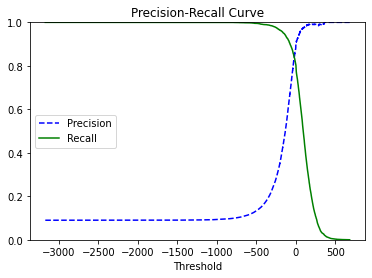

In [27]:
#precision/recall trade off curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve, f1_score, auc

# Escalar los datos para que tengan media 0 y varianza 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Entrenar el clasificador SGD con el conjunto de entrenamiento escalado
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train_5)

# Obtener las puntuaciones de decisión del clasificador en lugar de las predicciones
y_scores = sgd_clf.decision_function(X_train_scaled)

# Calcular la precisión, sensibilidad (recall) y umbrales para la curva de Precisión-Recall
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Crear un gráfico para visualizar la curva de Precisión-Recall
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")  # Trazar la precisión en función del umbral
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")  # Trazar la sensibilidad (recall) en función del umbral
plt.xlabel("Threshold")  # Etiqueta del eje x
plt.legend(loc="center left")  # Posición de la leyenda en el gráfico
plt.ylim([0, 1])  # Límites del eje y
plt.title("Precision-Recall Curve")  # Título del gráfico
plt.show()  # Mostrar el gráfico


<function matplotlib.pyplot.show(close=None, block=None)>

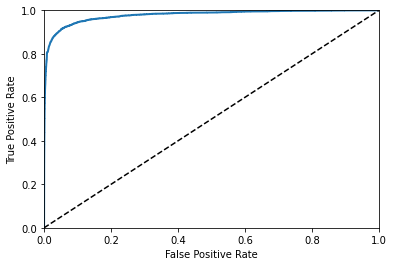

In [29]:
#curva roc
# Importar la función roc_curve de sklearn.metrics
from sklearn.metrics import roc_curve

# Calcular la tasa de falsos positivos (fpr), tasa de verdaderos positivos (tpr) y umbrales para la curva ROC
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# Definir una función para graficar la curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Graficar la curva ROC
    plt.plot([0, 1], [0, 1], 'k--')  # Graficar la línea diagonal que representa un clasificador aleatorio
    plt.axis([0, 1, 0, 1])  # Configurar los límites de los ejes x e y
    plt.xlabel('False Positive Rate')  # Etiqueta del eje x
    plt.ylabel('True Positive Rate')  # Etiqueta del eje y

# Graficar la curva ROC utilizando la función definida
plot_roc_curve(fpr, tpr)
plt.show()

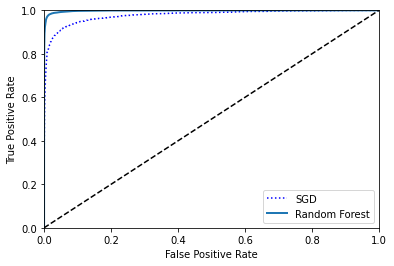

In [30]:
#comparar modelos con curva roc
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

# Obtener las probabilidades de la clase positiva mediante validación cruzada
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

# Seleccionar sólo la probabilidad de la clase positiva
y_scores_forest = y_probas_forest[:, 1]

# Calcular la curva ROC
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# Graficar la curva ROC para compararla con la del modelo SGDClassifier
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [35]:
#multiclase clasificacion con OneVsOneClassifier
from sklearn.multiclass import OneVsOneClassifier
ovr_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovr_clf.fit(X_train,y_train)

#caso de multiclase con sdgcclassifier, no necesitamos las funciones anteriores
#ya que el clasificador lo hace por defecto
sgd_clf.fit(X_train,y_train)
cross_val_predict(sgd_clf,X_train,y_train,cv=3)

array([7, 2, 0, ..., 2, 7, 1])

In [33]:
#otra forma 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Cargar el dataset
digits = load_digits()

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el clasificador multiclase utilizando la estrategia OneVsOne
sgd_clf = SGDClassifier(random_state=42)
ovo_clf = OneVsOneClassifier(sgd_clf)
ovo_clf.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = ovo_clf.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [37]:
#analisis del error
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[132,   0,   0,   0,   0,   1,   0,   0,   2,   0],
       [  0, 127,   0,   2,   0,   0,   2,   1,   9,   4],
       [  0,   0, 137,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 125,   0,   0,   0,   4,   5,   3],
       [  0,   2,   0,   0, 118,   0,   1,   1,   1,   3],
       [  0,   0,   0,   1,   0, 114,   1,   2,   1,   4],
       [  0,   1,   0,   0,   1,   1, 130,   0,   3,   0],
       [  0,   1,   0,   1,   1,   0,   0, 133,   1,   1],
       [  0,   7,   1,   1,   0,   1,   2,   1, 119,   4],
       [  0,   1,   0,   4,   0,   2,   0,   4,   5, 116]])

Confusion matrix:
[[42  0  0  0  0  1  0  0  0  0]
 [ 0 36  0  0  1  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  1  0]
 [ 0  0  0 45  0  1  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  1 56  1  0  0  1]
 [ 0  0  0  0  1  0 44  0  0  0]
 [ 0  0  1  0  0  0  0 39  0  1]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  1  0  0  2 45]]


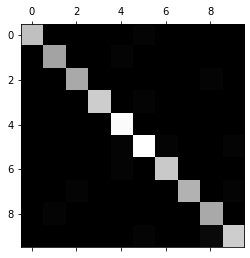

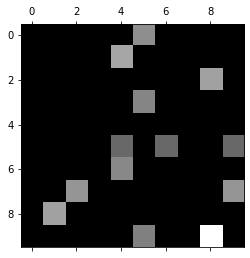

In [38]:
#analisis del error con graficos
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Obtener la matriz de confusión
conf_mx = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n{conf_mx}')

# Mostrar la matriz de confusión como una imagen
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# Calcular la tasa de error por clase
# Calcular la suma de las filas de la matriz de confusión y mantener las dimensiones
row_sums = conf_mx.sum(axis=1, keepdims=True)

# Dividir cada elemento de la matriz de confusión por la suma de su fila
norm_conf_mx = conf_mx / row_sums

# Rellenar la diagonal con ceros para que no se muestre en el gráfico
np.fill_diagonal(norm_conf_mx, 0)

# Mostrar la matriz normalizada como una imagen en escala de grises
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


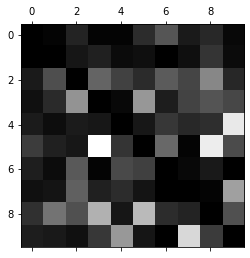

In [41]:
# Importar librerías necesarias
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784')

# Obtener las características (imágenes) y las etiquetas
X = mnist.data
y = mnist.target

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador de Regresión Logística
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Entrenar el clasificador en el conjunto de entrenamiento
log_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_test_pred = log_reg.predict(X_test)

# Calcular la matriz de confusión
conf_mx = confusion_matrix(y_test, y_test_pred)

# Normalizar la matriz de confusión para poder comparar las proporciones de errores
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

# Mostrar la matriz de confusión como una imagen
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


## Script Integrador del paso a paso de estudio de clasificacion que vimos

In [43]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Convertir las etiquetas a valores enteros
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

# Crear un clasificador binario para detectar el número 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Crear un pipeline de preprocesamiento y clasificación
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train_5)

# Realizar predicciones en el conjunto de prueba
y_test_pred = pipeline.predict(X_test)

#calculo la precision con accuracy_score
accuracy=accuracy_score(y_test_5,y_test_pred)
print("Accuracy: ", accuracy)
#calculo con cross_val_score
acrossval=cross_val_score(pipeline,X_train,y_train_5,cv=3,scoring="accuracy")
print("Cross_val_score: ", acrossval)

# Calcular las métricas de rendimiento
conf_mx = confusion_matrix(y_test_5, y_test_pred)
precision = precision_score(y_test_5, y_test_pred)
recall = recall_score(y_test_5, y_test_pred)
f1 = f1_score(y_test_5, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test_5, pipeline.decision_function(X_test))
roc_auc = roc_auc_score(y_test_5, pipeline.decision_function(X_test))

# Graficar la matriz de confusión
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Graficar la curva de Precisión-Recall
y_scores = pipeline.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test_5,y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.ylim([0, 1])
plt.title("Precision-Recall Curve")
plt.show()

# Graficar la curva ROC
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC={roc_auc:.2f})')
plt.show()

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy:  0.9697142857142858


2. Luego conteste las siguientes preguntas:
- ¿Que es un clasificador Binario?
- ¿Por qué un modelo con gran accuracy puede que no ser un buen modelo?
- ¿Por qué existe un trade off entre presicion y recall?
- ¿F1 es la mejor métrica que se puede utilizar al momento de optimizar un modelo? Justifique.
- ¿Para que sirve la curva ROC?
3. Utilice el clasificador KNeighborsClassifier y optimice los hiperparámetros utilizando GridSearch. ¿Qué accuracy se alcanza en el test set?